In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Using a built-in dataset for this example
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Decision Tree (max_depth=3) Accuracy: 0.9649


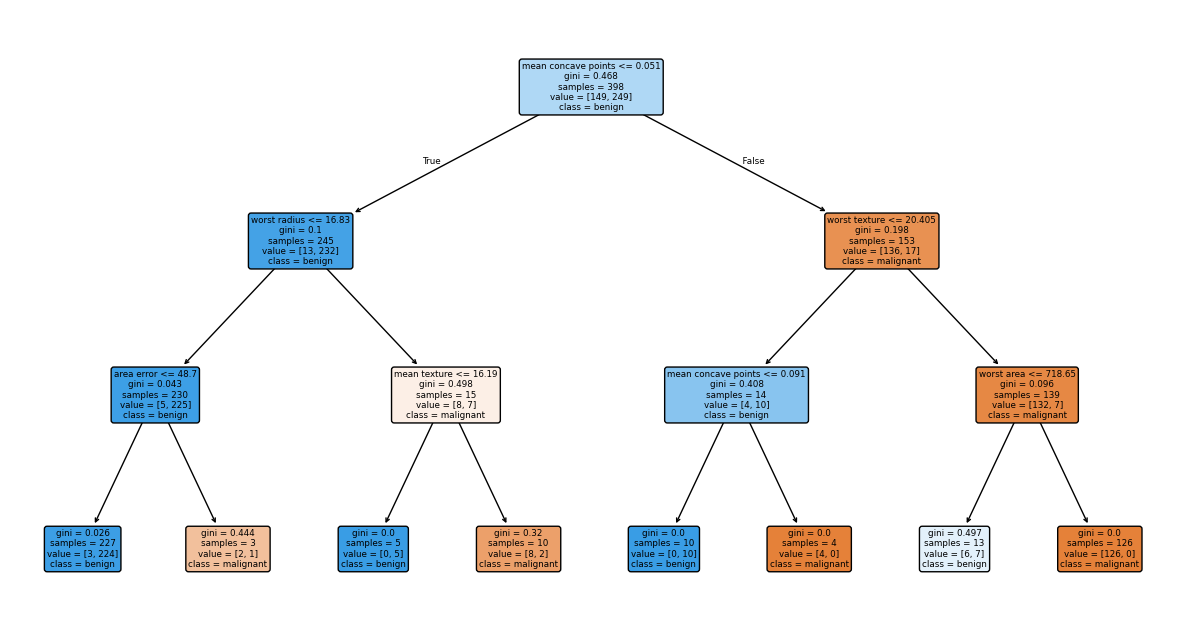

In [2]:
# Train a Decision Tree with a limited depth
dt_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_limited.fit(X_train, y_train)

# Evaluate the new model
y_pred_limited = dt_limited.predict(X_test)
accuracy_limited = accuracy_score(y_test, y_pred_limited)
print(f"Decision Tree (max_depth=3) Accuracy: {accuracy_limited:.4f}")

# Visualize the limited-depth tree
plt.figure(figsize=(15, 8))
plot_tree(dt_limited,
          filled=True,
          rounded=True,
          feature_names=feature_names,
          class_names=data.target_names)
plt.show()

In [4]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Compare with the Decision Tree
print(f"Decision Tree Accuracy: {accuracy_limited:.4f}")

Random Forest Accuracy: 0.9708
Decision Tree Accuracy: 0.9649


Top 10 Feature Importances:
                 feature  importance
7    mean concave points    0.141934
27  worst concave points    0.127136
23            worst area    0.118217
6         mean concavity    0.080557
20          worst radius    0.077975
22       worst perimeter    0.074292
2         mean perimeter    0.060092
3              mean area    0.053810
26       worst concavity    0.041080
0            mean radius    0.032312


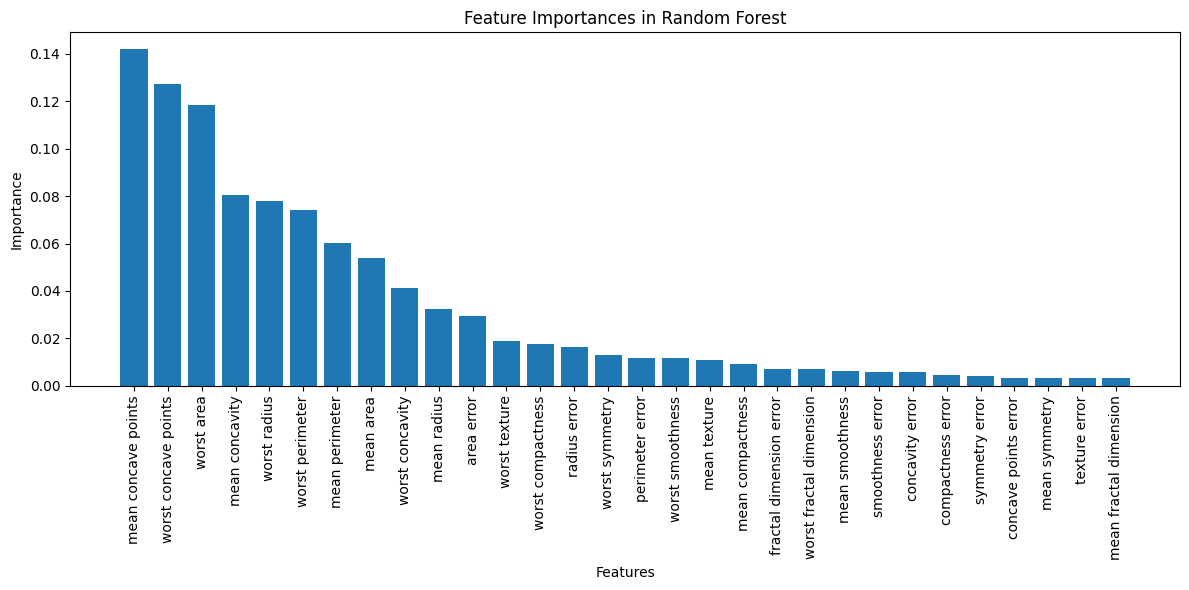

In [5]:
# Get feature importances from the trained Random Forest
importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort and display the top features
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print("Top 10 Feature Importances:")
print(feature_importance_df.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.title('Feature Importances in Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [6]:
# Perform 5-fold cross-validation on the Decision Tree
dt_cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)
print(f"Decision Tree Cross-Validation Scores: {dt_cv_scores}")
print(f"Decision Tree Mean Accuracy: {dt_cv_scores.mean():.4f}")

# Perform 5-fold cross-validation on the Random Forest
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5)
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Mean Accuracy: {rf_cv_scores.mean():.4f}")

Decision Tree Cross-Validation Scores: [0.9122807  0.90350877 0.92982456 0.95614035 0.88495575]
Decision Tree Mean Accuracy: 0.9173
Random Forest Cross-Validation Scores: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Random Forest Mean Accuracy: 0.9561
